<a href="https://colab.research.google.com/github/soyoonjeong/SAI-ML-STUDY/blob/main/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 붓꽃 품종 예측하기

In [ ]:
from sklearn.datasets import load_iris # 데이터셋 생성 모듈
from sklearn.tree import DecisionTreeClassifier # ML 알고리즘 : 의사결정나무
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터로 분리 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
iris = load_iris()

iris_data = iris.data # 피처
iris_label = iris.target # 레이블

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) # 데이터프레임으로 만들기
iris_df['label'] = iris_label

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

#### 1. 데이터 세트 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 49)
# test_size = 전체 데이터 세트 중 테스트 데이터 세트의 비율
# random_state = 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

#### 2. 모델 학습

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=49) # 객체로 생성

In [ ]:
dt_clf.fit(X_train, y_train) # 학습

DecisionTreeClassifier(random_state=49)

#### 3. 예측 수행

In [ ]:
pred = dt_clf.predict(X_test) # 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측

#### 4. 평가

In [ ]:
from sklearn.metrics import accuracy_score
print("예측 정확도 : {0:4f}".format(accuracy_score(y_test, pred))) # 정확도로 성능 평가

예측 정확도 : 0.933333


# Model Selection 모듈 소개 
- 학습 데이터와 테스트 데이터 분리
- 교차 검증 분할 및 평가
- 하이퍼 파라미터 튜닝

## 학습/테스트 데이터 세트 분리 : train_test_split()

In [ ]:
# Problem
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
train_features = iris.data
train_label = iris.target

dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_features, train_label) # 학습

pred = dt_clf.predict(train_features)  # 학습한 데이터 세트를 기반으로 예측
print("예측 정확도 :", accuracy_score(train_label, pred))
# 예측을 수행하는 데이터 세트는 학습용 데이터 세트가 아닌 테스트 데이터 세트여야 함

예측 정확도 : 1.0


- train_test_split()은 첫번째 파라미터로 피처 데이터 세트를, 두번째 파라미터로 레이블 데이터 세트를 입력받음
- test_size : 전체 데이터에서 테스트 데이터의 크기를 얼마로 샘플링 (0.25)
- shuffle : 데이터를 미리 섞을지 결정 (True)
- random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
- 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트를 튜플 형태로 반환

In [ ]:
# Solution
from sklearn.model_selection import train_test_split

iris = load_iris()
dt_clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state=121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test) # 테스트 데이터로 예측 수행
print("예측 정확도 :", accuracy_score(y_test, pred))

예측 정확도 : 0.9555555555555556


## 교차 검증 

- Problem : 고정된 학습 데이터와 테스트 데이터로 평가하다 보면 해당 테스트 데이터에 과적합되는 학습 모델 만들어져 다른 테스트용 데이터가 들어오면 성능 저하
- Solution : 교차검증 ( 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행 )

### K 폴드 교차 검증

K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

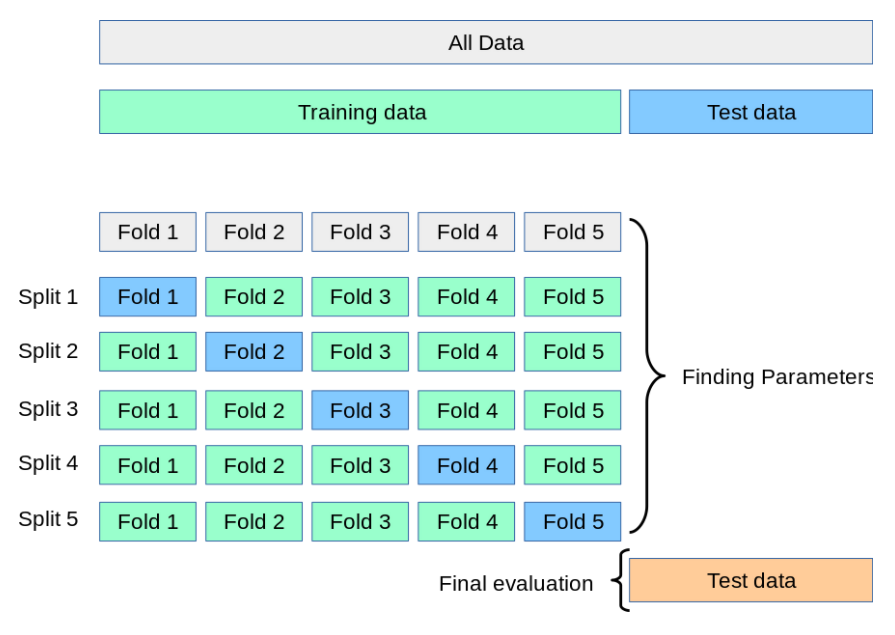

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

iris = load_iris()
features = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state = 49)

kfold = KFold(n_splits=5) # KFold 객체 생성
cv_accuracy = []
n_iters = 0

for train_idx, test_idx in kfold.split(features):
  # kfold.split()으로 반환된 인덱스로 학습용, 검증용 데이터 추출
  X_train, X_test = features[train_idx], features[test_idx]
  y_train, y_test = label[train_idx], label[test_idx]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iters +=1

  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred),4)
  cv_accuracy.append(accuracy)

  print('\n\n{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iters, accuracy, X_train.shape[0], X_test.shape[0]))
  print("\n{0} 검증 세트 인덱스 : {1}".format(n_iters, test_idx))

print("\n평균 검증 정확도 :", np.mean(cv_accuracy))




1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


2 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]


3 교차 검증 정확도 : 0.9, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]


4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


5 교차 검증 정확도 : 0.8333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30

5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도 : 0.9333199999999999


### Stratified K 폴드

- Problem : 레이블 데이터 세트가 불균형한 분포도를 가지고 있을 경우 K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값의 비율을 제대로 반영하지 못할 수 있음

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 3)
n_iter = 0

for train_idx, test_idx in kfold.split(iris_df):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_idx]
  label_test = iris_df['label'].iloc[test_idx]
  print('\n## 교차 검증 : {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증 : 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


=> 전체 레이블 분포 반영 못함

- Solution : 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_idx, test_idx in skf.split(iris_df, iris_df['label']): # split() 메서드의 인자로 레이블 데이터 세트도 필요하다
  n_iter+=1
  label_train = iris_df['label'].iloc[train_idx]
  label_test = iris_df['label'].iloc[test_idx]
  print('\n## 교차 검증 : {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증 : 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


=> 학습 레이블과 검증 레이블 값의 분포도가 동일하게 할당됨

In [ ]:
df_clf = DecisionTreeClassifier(random_state = 121)
skfold = StratifiedKFold(n_splits=3)
n_iters = 0
cv_accuracy = []

iris = load_iris()
features = iris.data
label = iris.target

for train_idx, test_idx in skfold.split(features, label):
  # 학습, 검증 데이터 추출
  X_train, X_test = features[train_idx], features[test_idx]
  y_train, y_test = label[train_idx], label[test_idx]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iters +=1
  accuracy = np.round(accuracy_score(y_test, pred),4)
  cv_accuracy.append(accuracy)

  print('\n\n{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iters, accuracy, X_train.shape[0], X_test.shape[0]))
  print("\n{0} 검증 세트 인덱스 : {1}".format(n_iters, test_idx))

print("\n평균 검증 정확도 :", np.mean(cv_accuracy))



1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50

1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]


2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50

2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]


3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50

3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도 : 0.9666666666666667


## 하이퍼 파라미터 튜닝 : GridSearchCV

교차 검증을 기반으로 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾음
- estimator : classifier, regressor, pipeline
- param_grid : 파라미터명(key), 사용될 여러 파라미터 값(리스트)로 이루어진 딕셔너리
- scoring : 예측 성능을 측정할 평가 방법
- cv : 교차 검증을 위해 분할되는 세트의 개수 
- refit : 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 파라미터로 재학습시킴

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]} # 파라미터 딕셔너리 -> param_grid

In [ ]:
grid_dtree = GridSearchCV(dtree, parameters, cv=3, refit=True) # param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정

grid_dtree.fit(X_train, y_train) # 학습 데이터를 폴딩 세트로 분할해 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가 수행

scores_df = pd.DataFrame(grid_dtree.cv_results_) # cv_results_ : GridSearchCV의 결과
scores_df[['params','mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1


=> 6개의 파라미터 조합으로 3번 교차검증을 수행했으므로 총 18번의 학습/평가가 이루어짐


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:', grid_dtree.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.975


In [ ]:
from sklearn.metrics import accuracy_score
# refit=True이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 estimator를 학습해 best_estimator_에 저장
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print("테스트 데이터 세트 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9667


# 데이터 전처리 (preprocessing)

- 결손값, 즉 NaN, Null 값은 허용되지 않음
  - 피처 값 중 Null 값이 얼마 되지 않는다면 평균값 등으로 대체
  - 피처 값 중 Null 값이 대부분이라면 해당 피처 드롭
- 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야 함
  - 카테고리형 피처 : 코드 값으로 표현
  - 텍스트형 피처 : 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제

## 데이터 인코딩

### 레이블 인코딩
문자열 값을 숫자형 카테고리 값으로 변환<br>
- LabelEncoder 클래스로 구현, fit()과 transform()
- 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문에 예측 성능이 떨어질 수 있음
  - 선형 회귀와 같은 ML 알고리즘 : 레이블 인코딩 적용하면 안됨
  - 트리 계열의 ML 알고리즘 : 숫자의 특성을 반영하지 않으므로 레이블 인코딩 적용 가능

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['사과','바나나','키위','배','포도','사과','딸기','딸기']

encoder = LabelEncoder() # LabelEncoder 객체 생성
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[3 1 4 2 5 3 0 0]


In [ ]:
print(encoder.classes_) # 인코딩 클래스

['딸기' '바나나' '배' '사과' '키위' '포도']


In [ ]:
print(encoder.inverse_transform([3, 1, 4, 2, 5, 3, 0, 0])) # 디코딩 원본값

['사과' '바나나' '키위' '배' '포도' '사과' '딸기' '딸기']


### 원-핫 인코딩
피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시
- OneHotEncoder 클래스로 변환
1. 변환하기 전 모든 문자열 값이 숫자형 값으로 변환
2. 입력 값으로 2차원 데이터 필요

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

items = ['사과','수박','딸기','딸기','메론','포도','참외','포도']

# 숫자형 값으로 변환 => 레이블 인코딩
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
print(encoder.classes_)

# 2차원 데이터로 변환
labels = labels.reshape(-1,1) #(8,1)

# 원-핫 인코딩
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

['딸기' '메론' '사과' '수박' '참외' '포도']
원-핫 인코딩 데이터
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
원-핫 인코딩 데이터 차원
(8, 6)


- get_dummies() 이용 : 문자형 카테고리 값을 숫자형으로 변환할 필요없음

In [ ]:
df = pd.DataFrame({'items':['사과','수박','딸기','딸기','메론','포도','참외','포도']})
pd.get_dummies(df)

,items_딸기,items_메론,items_사과,items_수박,items_참외,items_포도
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,0,0,1
6,0,0,0,0,1,0
7,0,0,0,0,0,1


## 피처 스케일링
서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

### 표준화 : StandardScaler
-  데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신이나 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됨 -> 사전에 표준화를 적용하면 성능 향상에 도움됨!
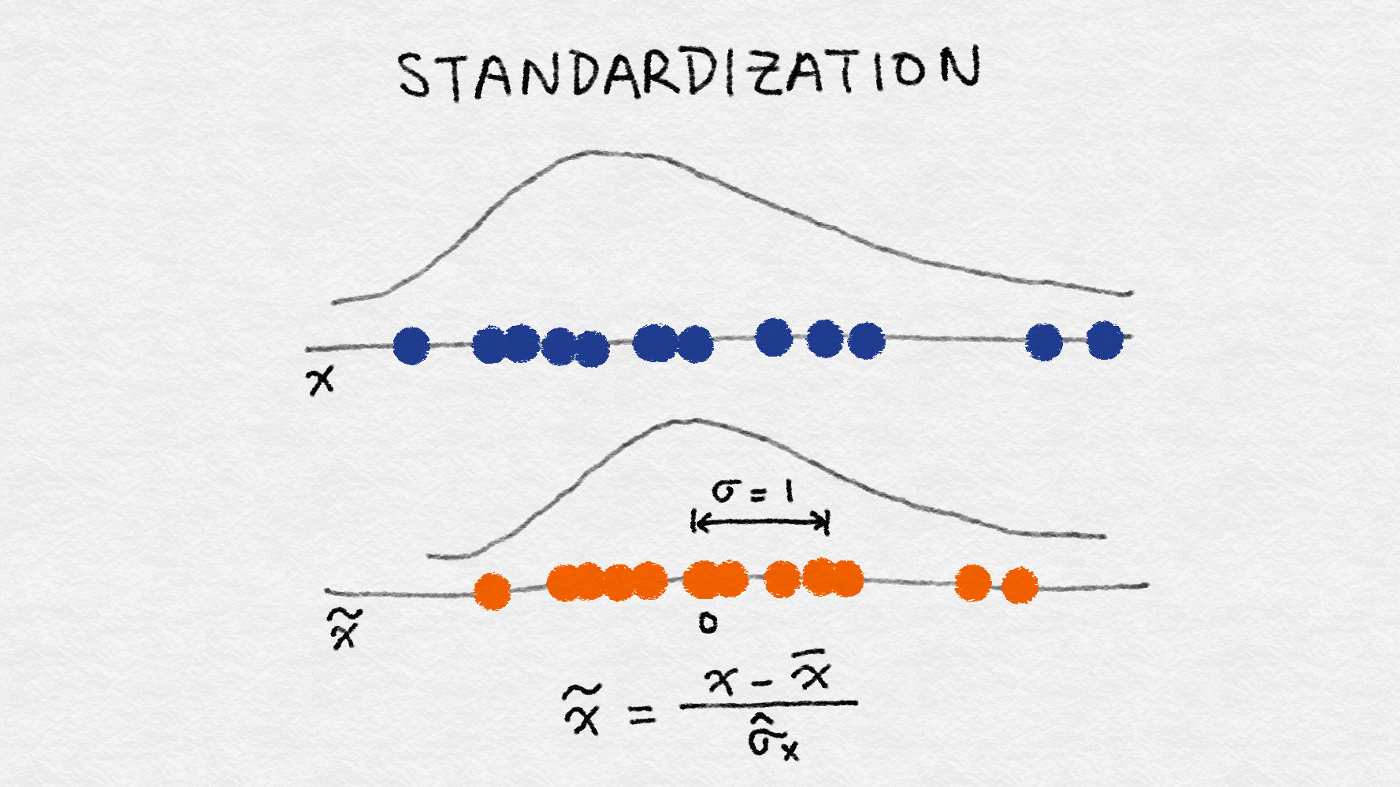


In [ ]:
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 DataFrame으로 변환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균값') # 0
print(iris_df_scaled.mean())
print('feature들의 분산') # 1
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### 정규화 : MinMaxScaler
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환 (최소 0~최대 1)
- 데이터의 분포가 가우시안 분포가 아닐 경우 Min, Max Scale을 적용해볼 수 있음
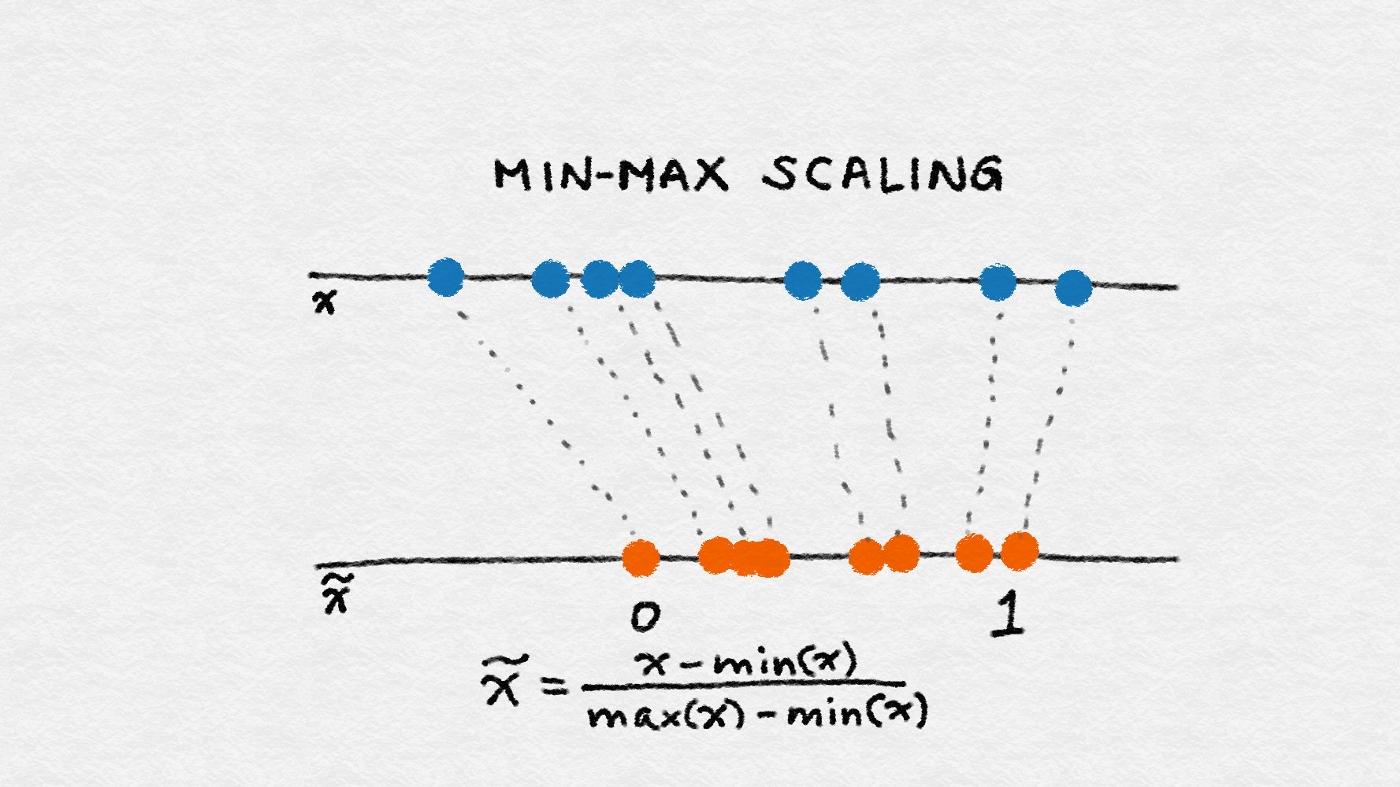

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns =iris.feature_names)
print("feature들의 최솟값") # 0
print(iris_df_scaled.min())
print("feature들의 최댓값") # 1
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- fit() : 데이터 변환을 위한 기준 정보 설정
- transform() : 설정된 기준 정보를 이용해 데이터를 변환
- fit_transform() : fit()과 transform()을 한 번에 적용

학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용<br>이유 : 학습 데이터와 테스트 데이터의 기준 정보가 서로 달라져 올바른 예측 결과를 도출하지 못하기 때문에 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 :',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

scaler.fit(test_array)
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터 :',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 :', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


서로 다른 원본값이 동일한 값으로 변환됨<br>
-> 머신러닝 모델은 학습 데이터 기반으로 학습되기 때문에 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 :',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

# scaler.fit(test_array) 제거
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터 :',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 :', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


학습 데이터와 테스트 데이터의 스케일링 변환 시 유의할 점
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않으면 테스트 변환 시에는 fit(), fit_transform() 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

### 벡터 정규화 : Normalizer 
- 개별 벡터의 크기를 맞췩 위해 변환하는 것
- 선형대수에서의 정규화 개념이 적용
- 개별 벡터를 모든 피처 벡터의 크기로 나눠줌

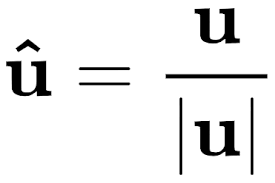